# Comparasion NN and Perceptron 1.0
## Thanasak Harisombut

Date: 25/10/2020

Environment: R and Jupyter notebook

# Neural Network vs. Perceptron algorithms


### Initial process

In [1]:
# import library
library(reshape2)
library(ggplot2)

In [2]:
####################### GENERAL AUXILIARY FUNCTIONS #######################
### credit: https://stat.ethz.ch/pipermail/r-help/2004-June/053343.html
list <- structure(NA,class="result")
"[<-.result" <- function(x,...,value) {
  args <- as.list(match.call())
  args <- args[-c(1:2,length(args))]
  length(value) <- length(args)
  for(i in seq(along=args)) {
    a <- args[[i]]
    if(!missing(a)) eval.parent(substitute(a <- v,list(a=a,v=value[[i]])))
  }
  x
}

# reading the data
read.data <- function(file.name, scaling=FALSE) {
  data <- read.csv(file=file.name,head=TRUE,sep=",")
  data <- data[complete.cases(data),] # removes rows with NA values
  D <- ncol(data)
  x = data[,-D]
  y = data[,D]
  if (isTRUE(scaling)) {
    x = scale(x)
    y = scale(y)
  }
  return (list('x' = x, 'y' = y))
}

error.rate <- function(Y1, T1){
  if (length(Y1)!=length(T1)){
    stop('error.rate: size of true lables and predicted labels mismatch')
  }
  return (sum(T1!=Y1)/length(T1))
}

### I. Load Task2B_train.csv and Task2B_test.csv sets, plot the training data with classes are marked with different colors, and attach the plot to your PDF report.


In [3]:
# Read the datasets
set.seed(1234)          # set random seed

list[X1,T1] <- read.data('Dataset/Task2B_train.csv') # read training data
T1[T1==0] <- -1         # convert 0 labels to -1 
list[X2,T2] <- read.data('Dataset/Task2B_test.csv') # read test data
T2[T2==0] <- -1         # convert 0 labels to -1 


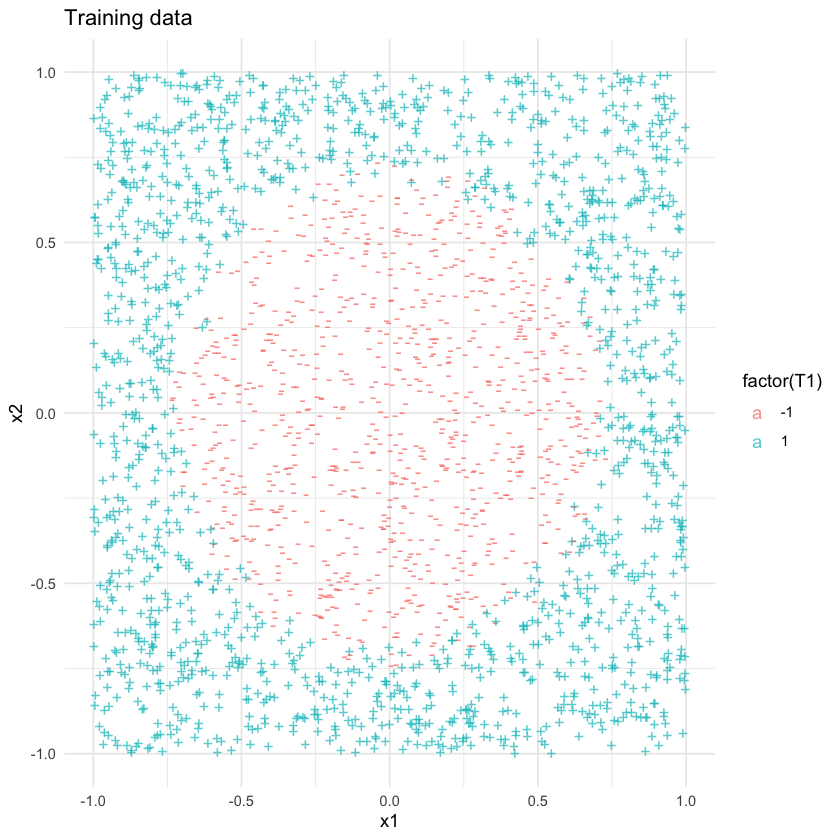

In [4]:
ggplot(data=as.data.frame(X1), 
       aes(x = x1, y = x2, color = factor(T1), label = ifelse(T1==1, '+', '-'))) +   
    geom_text(alpha=0.7) + 
    ggtitle ('Training data') + 
    theme_minimal()


### II. Train two perceptron models on the loaded training data by setting the learning rates η to .01 and .09 respectively, using a code from Activity 3.1. Calculate the test errors of two models and find the best η and its corresponding model, then plot the test data while the points are colored with their estimated class labels using the best model that you have selected; attach the plot to your PDF report.

In [5]:
####################### PERCEPTRON #######################
## prediction
perceptron.predict <- function(Phi, W){
  return(ifelse(Phi%*%W>=0, +1, -1))
}
## is it a misclassification? if yes, update the weight vector
is.a.miss <- function(Phi, W, T1){
  return((W%*%Phi)*T1<0)
}
## Perceptron Build function
perceptron.build <- function(X1, T1, eta=0.01, epsilon=0.001, tau.max=100, plotting=FALSE){
  if (length(unique(T1))!=2){
    stop("Perceptron: The input data is not a binary classification problem.")
  }
  if (all(sort(unique(T1)) != c(-1, 1))) {
    stop("Perceptron: The labels are not (-1, +1).")
  }
  
  N1 <- nrow(X1)
  Phi <- as.matrix(cbind(1, X1)) # add a column of 1 as phi_0

  W <- matrix(NA,nrow=tau.max, ncol=ncol(Phi)) # Empty Weight vector
  W[1,] <- 2*runif(ncol(Phi))-1 # Random initial values for weight vector
  error.rec <- matrix(NA,nrow=tau.max, ncol=1) # Placeholder for errors
  error.rec[1] <- error.rate(perceptron.predict(Phi, W[1,]), T1) # record error for initial weights
  tau <- 1 # iteration counter 
  terminate <- FALSE # termination status
  
  while(!terminate){
    # resuffling train data and associated labels:
    indx <- sample(1:N1, replace = FALSE)
    Phi <- Phi[indx,]
    T1 <- T1[indx]
    
    for (i in 1:N1){
      if (tau >= tau.max) {break}
      # look for missclassified samples
      if (is.a.miss(Phi[i,], W[tau,], T1[i])){
        tau <- tau +1                                 # update tau counter
        W[tau,] <- W[tau-1,] + eta * Phi[i,] * T1[i]  # update the weights
        error.rec[tau] <- error.rate(perceptron.predict(Phi, W[tau,]), T1)# update the records
        eta = eta * 0.99                                 # decrease eta
      } 
    }
    
    # recalculate termination conditions
    terminate <- tau >= tau.max | (abs(error.rec[tau] - error.rec[tau-1]) <= epsilon )
    
  }
  if (plotting){
    plot(error.rec[complete.cases(error.rec),], xlab = 'tau', ylab = 'error', main = 'Perceptron')
  }
  W <- W[complete.cases(W),]  # cut the empty part of the matrix (when the loop stops before tau == tau.max)
  return(W[nrow(W),])         # return the last wight vector
}

### learning rates η to 0.01

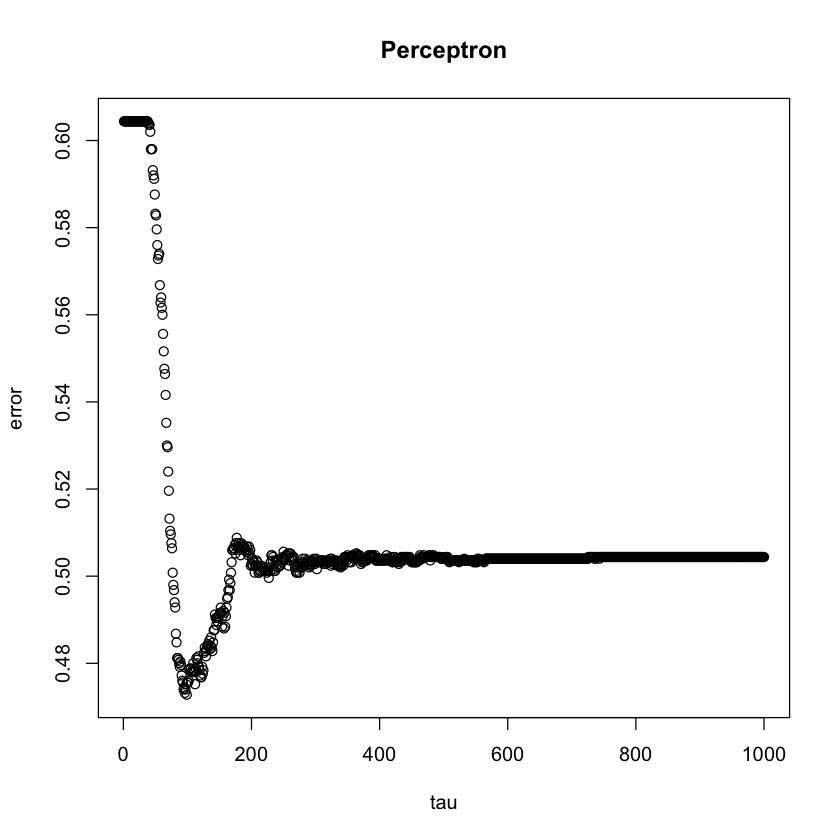

In [6]:
# Build a perceptron and plot its train error curve
W.01 <- perceptron.build(X1, T1, eta = 0.01, tau.max = 1000, plotting = TRUE) # Run this a few times until you are happy with the result


In [7]:
# Evaluate Perceptron
Phi.01 <- as.matrix(cbind(1, X2))
test.labels.01 <- perceptron.predict(Phi.01, W.01)
error.rate.01 = error.rate(test.labels.01, T2)
paste("Error rate = " ,error.rate.01*100 ,"%") 

[1] "Error rate =  51.68 %"

### learning rates η to 0.09

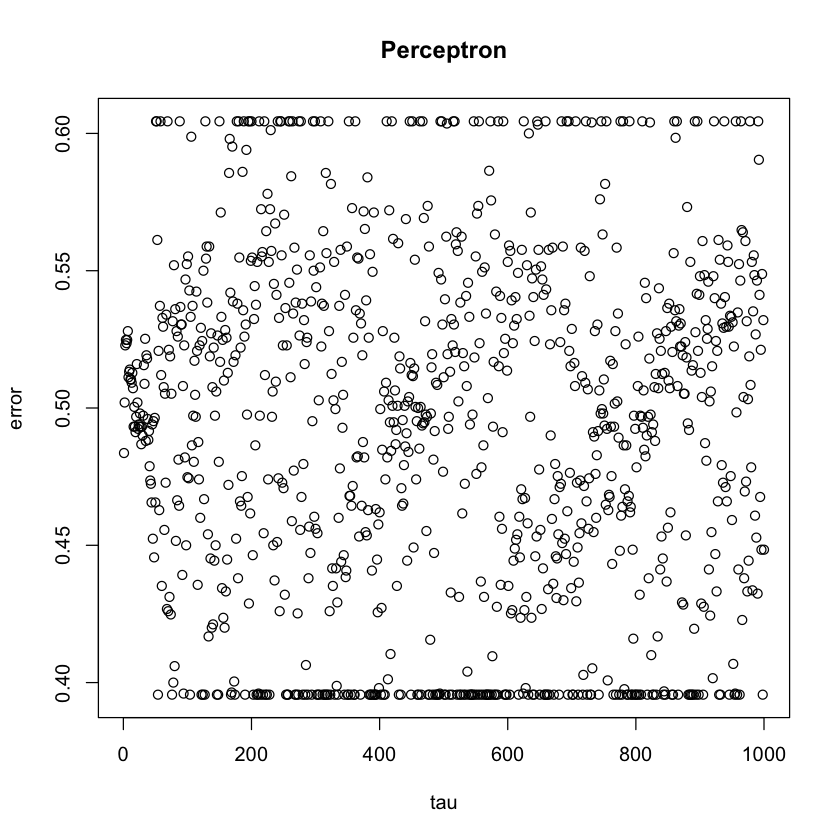

In [8]:
# Build a perceptron and plot its train error curve
W.09 <- perceptron.build(X1, T1, eta = 0.09, tau.max = 1000, plotting = TRUE) # Run this a few times until you are happy with the result


In [9]:
# Evaluate Perceptron
Phi.09 <- as.matrix(cbind(1, X2))
test.labels.09 <- perceptron.predict(Phi.09, W.09)
error.rate.09 = error.rate(test.labels.09,T2)
paste("Error rate = " ,error.rate.09*100 ,"%") 

[1] "Error rate =  46.24 %"

### Find the best learning rate and plot.

[1] "The best η is 0.09 with 46.24% error rate."


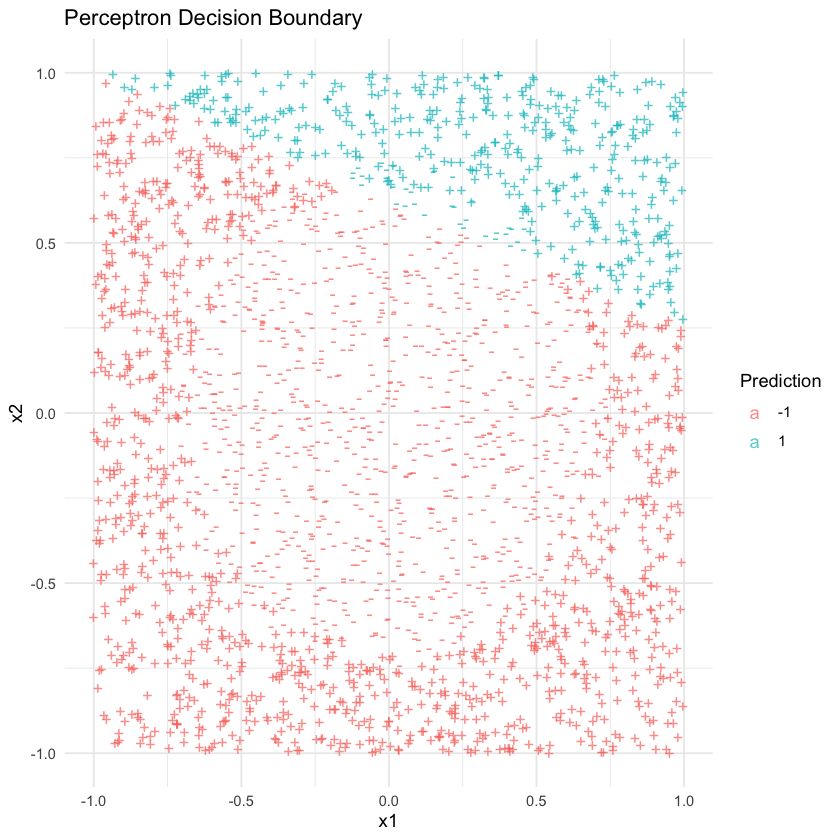

In [10]:
# Plot Perceptron Decision Boundary
## Hint: Plot the testing data with different symbols for each class (real labels). 
## Then color each point based on its predicted label.

Phi <- 0
test.labels <- 0

# find the best learning rate
if (error.rate.01 < error.rate.09){
    print(paste('The best η is 0.01 with ', error.rate.01*100, '% error rate.', sep=''))
    Phi <- Phi.01
    test.labels <- test.labels.01
    
} else {
    print(paste('The best η is 0.09 with ', error.rate.09*100, '% error rate.', sep=''))
    Phi <- Phi.09
    test.labels <- test.labels.09
}

# plot a result
ggplot(data=as.data.frame(Phi), 
       aes(x=x1, y=x2, label=ifelse(T2==1, '+', '-'), 
           color=factor(test.labels))) +
geom_text(alpha=0.7) +
scale_color_discrete(guide = guide_legend(title = 'Prediction'))+
ggtitle('Perceptron Decision Boundary')+
theme_minimal()

### III. For each combination of K (i.e, number of units in the hidden layer) in {5, 10, 15, ..., 100} and μ (learning rate) in {0.01, 0.09}, run the 3-layer Neural Network given to you in Activity 5.1 and record testing error for each of them (40 models will be developed, based on all possible combinations). Plot the error for μ 0.01 and 0.09 vs K (one line for μ 0.01 and another line for μ 0.09 in a plot). Based on this plot, find the best combination of K and μ and the corresponding model, then plot the test data while the points are colored with their estimated class labels using the best model that you have selected.

In [11]:
####################### NEURAL NET ####################### 
## the activation function (tanh here)
h <- function(z) { 
  return ((exp(z)-exp(-z))/(exp(z)+exp(-z)))
}

## the derivitive of the activation function (tanh here)
h.d <- function(z) {
return (1-(h(z))^2)
}

## Class Probabilities
class.prob <- function(X, W1, W2, b1, b2){
  a2 <- h(sweep(W1 %*% X, 1, b1,'+' ))
  a3 <- h(sweep(W2 %*% a2, 1, b2,'+' ))
  return (a3)
}
## prediction
nn.predict <- function(X, W1, W2, b1, b2, threshold=0){
  return (ifelse(class.prob(X, W1, W2, b1, b2)>=threshold, 1, -1))
}
## feedforward step
feedforward <- function(Xi, Ti, W1, b1, W2, b2){
  ### 1st (input) layer 
  a1 <- Xi
  y <- Ti
  ### 2nd (hidden) layer
  z2 <- W1 %*% a1 + b1
  a2 <- h(z2)        
  ### 3rd (output) layer
  z3 <- W2 %*% a2 + b2
  a3 <- h(z3)  
  return(list(a1, a2, a3, y, z2, z3))
}
## backpropagation step
backpropagation <- function(Ti, W2, z2, z3, a3){
  ### 3rd (output) layer
  d3 <- -(Ti-a3) * h.d(z3)
  ### 2nd (hidden) layer
  d2 <-  t(W2)%*%d3  * h.d (z2)
  return(list(d2,d3))
}
## NN build function
nn.build <- function(K, X1, T1, plotting=FALSE, epoch.max=50, eta = 0.1, lambda = 0.01){
  # initialization
  if (plotting) {error.rec <- matrix(NA,nrow=epoch.max, ncol=1)}
  D <- nrow(X1)
  if (D!=2) {stop('nn.predict: This simple version only accepts two dimensional data.')}
  N <- ncol(X1)

  W1 <- matrix(rnorm(D*K, sd=0.5), nrow=K, ncol=D)
  b1 <- matrix(rnorm(1*K), nrow=K, ncol=1)
  W2 <- matrix(rnorm(K*1, sd=0.5), nrow=1, ncol=K)
  b2 <- matrix(rnorm(1*1), nrow=1, ncol=1)

  for (epoch in 1:epoch.max){   
    ## delta vectors/matrices initialization
    W1.d <- W1 *0
    b1.d <- b1 *0
    W2.d <- W2 *0
    b2.d <- b2 *0

    for (i in 1:N){
      ## Feedforward:
      list[a1, a2, a3, y, z2, z3] <- feedforward(X1[,i], T1[i], W1, b1, W2, b2)          
      ## Backpropagation:
      list[d2, d3] <- backpropagation(T1[i], W2, z2, z3, a3)
      ## calculate the delta values
      ### 1st layer
      W1.d <- W1.d + d2 %*% t(a1)
      b1.d <- b1.d + d2
      ### 2nd layer
      W2.d <- W2.d + d3 %*% t(a2)
      b2.d <- b2.d + d3
    }
    ## update weight vectors and matrices
    W1 <- W1 - eta * (W1.d/N + lambda*W1)
    b1 <- b1 - eta * (b1.d/N)
    W2 <- W2 - eta * (W2.d/N + lambda*W2)
    b2 <- b2 - eta * (b2.d/N)
    ## record the errors
    if (plotting){error.rec[epoch]<- error.rate(nn.predict(X1, W1, W2, b1, b2), T1)}
  }
  if (plotting)
      plot(error.rec, xlab = 'epoch', ylab = 'error', main = 'Neural Net')
  return(list(W1, W2, b1, b2))
}

### Initial varibles for NN

In [12]:
# Build a number of Neural Networks with different number of units in the hidden layer
X1.t <- t(as.matrix(X1))
X2.t <- t(as.matrix(X2))

epoch.max <- 1000
lambda <- 0.01

### _learning rates η to 0.01_

In [13]:
nn.error.rate.01 = c()
i <- 1
for (k in seq(5, 100, 5)) {
    list[W1, W2, b1, b2]<- nn.build(k, X1.t, T1, plotting=FALSE, epoch.max=epoch.max, eta = 0.01, lambda = lambda)
    # Evaluate the model
    Y.01 <- nn.predict(X2.t, W1, W2, b1, b2)
  
    # Record the test errors for plotting purposes
    nn.error.rate.01[i] <- error.rate(Y.01, T2)
    i <- i + 1
}

In [14]:
nn.error.rate.01

[1] 0.3908 0.3908 0.6092 0.4904 0.2420 0.3552 0.1688 0.1976 0.2244 0.3588
[11] 0.1780 0.1476 0.1140 0.3960 0.1168 0.1116 0.3808 0.4368 0.4772 0.0864

### _learning rates η to 0.09_

In [15]:
nn.error.rate.09 = c()
i <- 1
for (k in seq(5, 100, 5)) {
    list[W1, W2, b1, b2]<- nn.build(k, X1.t, T1, plotting=FALSE, epoch.max=epoch.max, eta = 0.09, lambda = lambda)
    # Evaluate the model
    Y.09 <- nn.predict(X2.t, W1, W2, b1, b2)
  
    # Record the test errors for plotting purposes
    nn.error.rate.09[i] <- error.rate(Y.09, T2)
    i <- i + 1
}

In [16]:
nn.error.rate.09

[1] 0.2652 0.3908 0.0528 0.0740 0.0452 0.0480 0.0488 0.0732 0.0436 0.0464
[11] 0.0472 0.0444 0.0708 0.2584 0.1260 0.2464 0.1768 0.1236 0.1272 0.1888

### Plot the error for eta 0.01 and 0.09 vs K 

In [17]:
# merge 2 error data
error = data.frame(t(rbind(K=seq(5, 100, 5), eta.01=nn.error.rate.01, eta.09=nn.error.rate.09)))
error.m = melt(error, id='K')
names(error.m) <- c('K', 'learning.rate', 'error')


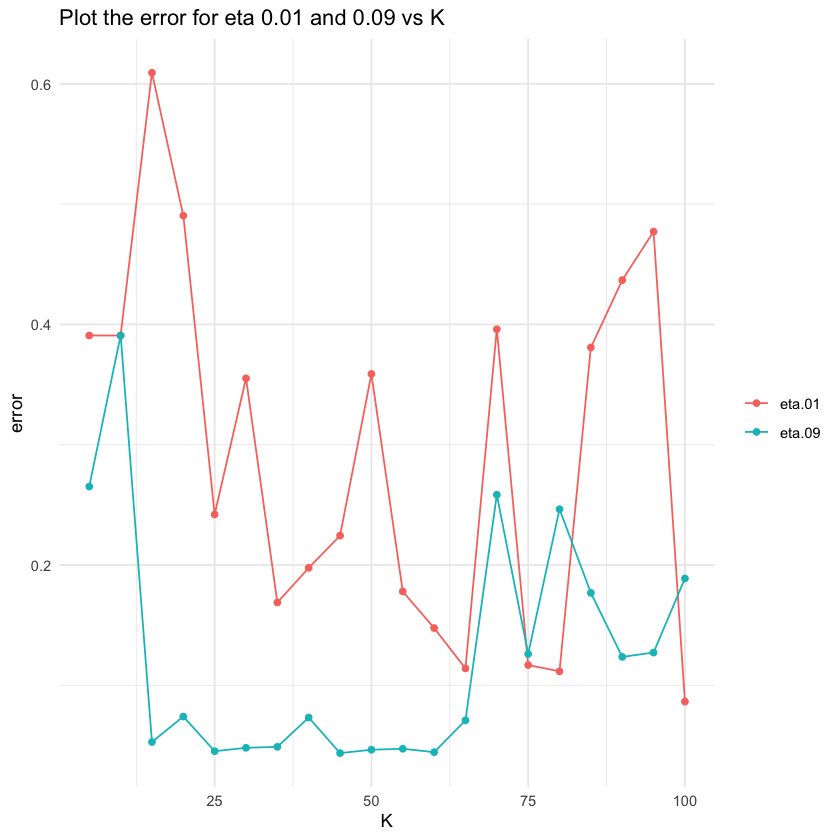

In [18]:
# plot graph
ggplot(data=error.m, aes(x=K, y=error, color=learning.rate)) + 
    geom_line() +
    geom_point()  +
    scale_color_discrete(guide = guide_legend(title = NULL)) + 
    ggtitle("Plot the error for eta 0.01 and 0.09 vs K") +
    theme_minimal()


### Find the best combination of K and μ

In [19]:
best.k <- error.m[which.min(error.m[,'error']),'K']
best.eta <- error.m[which.min(error.m[,'error']),'learning.rate']
best.eta <- as.double(substr(best.eta, 4, 6))

paste('The best K is ', best.k, 'and the best μ is ', best.eta)


[1] "The best K is  45 and the best μ is  0.09"

### Plot the test data while the points are colored with their estimated class labels

In [20]:
list[W1, W2, b1, b2]<- nn.build(best.k, X1.t, T1, plotting=FALSE, epoch.max=epoch.max, eta=best.eta, lambda=lambda)
Y <- nn.predict(X2.t, W1, W2, b1, b2)
nn.error.rate.op <- error.rate(Y, T2)
paste("Error rate = " ,nn.error.rate.op*100 ,"%")


[1] "Error rate =  4.68 %"

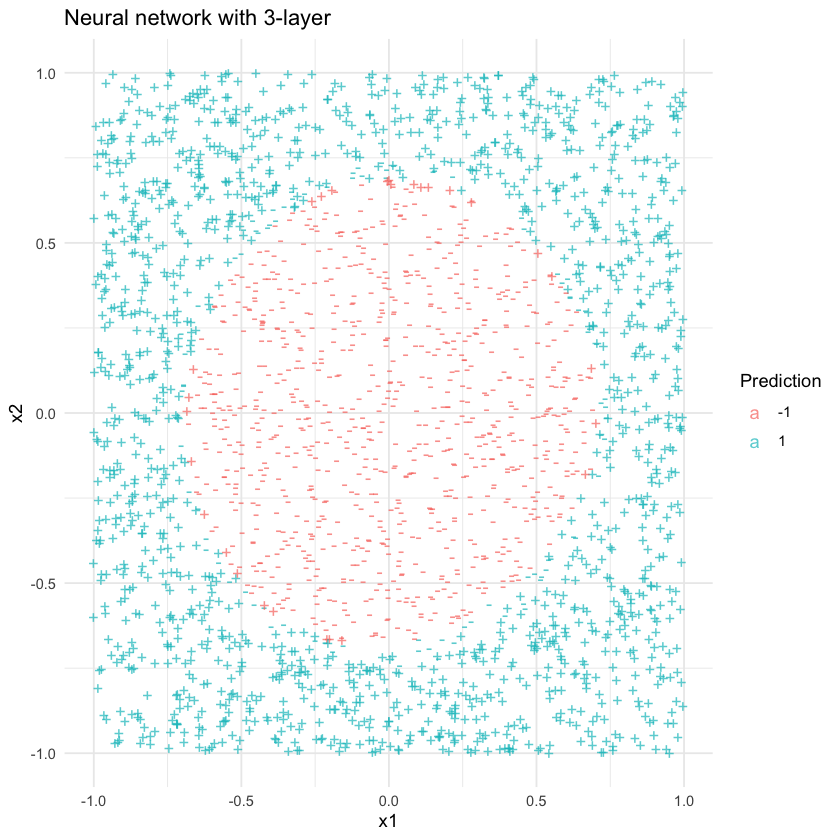

In [21]:
# plot
ggplot(data=X2, 
        aes(x=x1, y=x2, label=ifelse(T2==1, '+', '-'), 
        color=factor(Y))) +
    geom_text(alpha=0.7) +
    scale_color_discrete(guide = guide_legend(title = 'Prediction'))+
    ggtitle('Neural network with 3-layer') +
    theme_minimal()

# Conclusion

From the plots above, we can see that the perceptron gives a bad result with about 46% error rate since it can classify data linearly, whereas, the neural network is able to represent any kind of data due to each neuron works separately and combines an output at the end. Hence, the data in circular shape is not an issue for neural network. It can separate data correctly close to 95%, which is considerably more efficient comparing to the perceptron.